# PyPlot 2D
Matlab-like plotting in _Julia_ using PyPlot based on [matplotlib](http://matplotlib.org/api/pyplot_api.html) API
* Need to install [PyPlot](https://github.com/JuliaPy/PyPlot.jl) package
* For this example, add also [LsqFit](https://github.com/JuliaNLSolvers/LsqFit.jl) (will be used to plot fitted curve)
* Some nice examples can be found also [here](https://gist.github.com/gizmaa/7214002)

#### Load/import packages used in this notebook

In [1]:
using PyPlot
import LsqFit # to plot fitted curve
import StatsBase # to compute Spearmen's correlation

## Simple plotting
* **Plot two lines**/vectors in the same figure/plot

#### Generate data
* `x1` and `x1` have different sampling
* Same plotting commands could be used for DataArrays/Frames

In [2]:
x1 = collect(1:1:100);
x2 = collect(1:2:100);
# noise free signal
y1 = sin.(2*pi*1/40.*x1+10);
# add some noise
y2 = y1[1:2:end] + randn(length(x2))/10;

#### Plot both lines with independent x values
* Define figure size
* Plot two lines with two different x coordinates 
* Set plot title
* Add x and y labels + set fontsize
* Turn on grid lines
* Add legend + set fontsize
* Set y and x limits

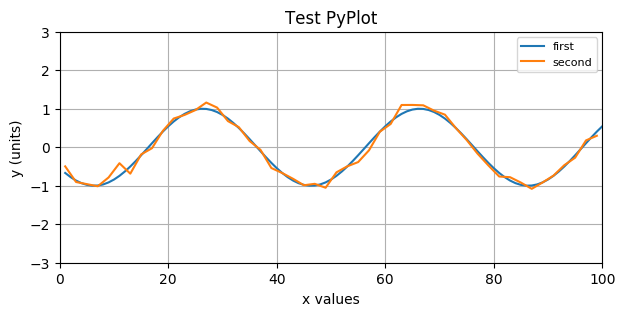

In [3]:
# Set figure size in inches
figure(figsize=(7,3));
plot(x1,y1,x2,y2);
# or plot(x1,y1);plot(x2,y2) # no hold on needed

# Add labels + set fontsize
ylabel("y (units)",fontsize=10);
title("Test PyPlot");

# turn on grid lines (off by default)
grid("on"); 
xlabel("x values");

# add legend
legend(["first", "second"],fontsize=8);

# set x&y limits
xlim([0,100]); # must be vector = separated by ','
ylim([-3,3]);

## Working with DateTime
* Plot time-dependent data
* Work with axes handle/object
* Specify line color + marker
* Specify tick position
* Specify date/time format on x axis
* Set position of a [legend](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend) and remove legend frame

In [4]:
# Generate time vector (same length as x1)
t = collect(DateTime(2010,1,1):Dates.Day(1):DateTime(2010,1,1)+Dates.Day(99));
# generate new vector with identical sampling as y1
y3 = y1 + randn(length(t))/10;

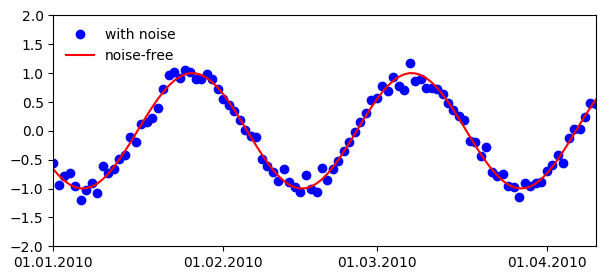

In [5]:
figure(figsize=(7,3));
# create new axes
ax = axes();

# Plot two one line (red) + blue dots for second vector
plot(t,y3,"bo");
plot(t,y1,"r-");

# PyPlot plots time ticks automatically (no need for `datetick`)
# specify position of x-ticks
xticks(collect(DateTime(2010,1,1):Dates.Month(1):DateTime(2011,1,1)));

# Formating date requires two steps: https://gist.github.com/gizmaa/7214002
# first create format
majorformatter = matplotlib[:dates][:DateFormatter]("%d.%m.%Y")
# second set the format using axes handle (for major ticks only)
ax[:xaxis][:set_major_formatter](majorformatter)

# Limit x and & y axis
xlim([t[1],t[end]])
ylim([-2,2])

# Set legend position + remove legend frame
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend
legend(["with noise", "noise-free"],loc="upper left",frameon=false); 

## Subplots
Plot input data and add fitted curve to correlation plot
* Place multiple plots inside one figure
* Specify line width + marker size
* Set/remove x/y ticks
* Get current x/y ticks
* Add text/annotation to plot
* Remove (sub)plot frame
* Print figure

In [6]:
# Prepare data/fit data to first degree polynomial model
m(x,p) = p[1] + x*p[2]; 
# estimate parameters
par1 = LsqFit.curve_fit(m,y1,y3,[0.,1.]);
# compute fitted curve
fit1 = m(y1,par1.param);
# compute Spearman's rank correlation
cor_13 = StatsBase.corspearman(y1,y3);

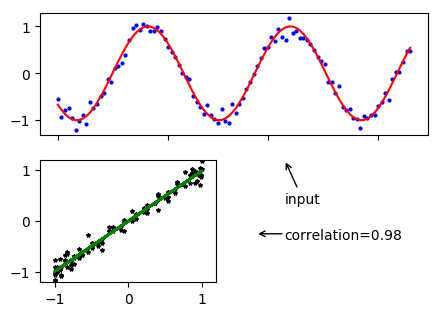

In [7]:
# Firs plot
figure(figsize=(5,3.5))
subplot(2,2,(1,2));
plot(t,y3,"bo",markersize=2);
plot(t,y1,"r-");
# Set xticks but without values
xticks(t[1]:Dates.Month(1):t[end],[]);# = set as empty

# Second plot
subplot(2,2,3);
plot(y1,y3,"k*",markersize=3);
plot(y1,fit1,"g-",linewidth=2)
xlim([-1.2,1.2])
locs, labels = yticks();
ylim([-1.2,1.2])

# Third plot with annotation
ax = subplot(2,2,4);
# Add arrow starting at (-0.75,0.25), and ending at (-1.15, 0.25)
# without any text
annotate("", xy=(-1.15, -0.25),xytext=(-0.75,-0.25),
            arrowprops=Dict(:arrowstyle=>"->"));
# Add text
annotate(@sprintf("correlation=%.2f",cor_13),xy=(-0.75,-0.35));
# Add arrow + text
annotate("input", xy=(-0.75, 1.2),xytext=(-0.75,0.35),
            arrowprops=Dict(:arrowstyle=>"->"));
ylim([-1.2,1.2])
xlim([-1.2,1.2])
# remove frame
ax[:axis]("off");

# Print
#savefig("normal_jpeg.jpg",dpi=300);
#savefig("transparent_plot.png",dpi=300,transparent=true);